In [1]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from keras.utils.vis_utils import plot_model
from keras_radam import RAdam

from helpers import*

Using TensorFlow backend.


## Loading the dataset 

In [2]:
data = pd.read_csv('datasets/bank-additional.csv', sep=';')

# Neural Network

In [ ]:
def run_benchmark(data, N_spec = 30):
    list_optimzers = ['adam', 'sgd', RAdam()]
    spects = np.linspace(0.5,0.99,N_spec)
    
    sgd_acc = []
    adam_acc = []
    radam_acc = []
    
    sgd_loss = []
    adam_loss = []
    radam_loss = []
    
    sgd_f1 = []
    adam_f1 = []
    radam_f1 = []
    
    sgd_precision = []
    adam_precision = []
    radam_precision = []
    
    sgd_recall = []
    adam_recall = []
    radam_recall = []
    
    for spect in spects:
        one_hot_enc = build_spectrum (data,do_spectrum = True ,spect = spect)
        X = one_hot_enc.drop(columns=['y'])
        y = one_hot_enc['y']
        x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
        x_train_keras, y_train_keras = build_keras (x_train,y_train)
        model = build_model()
        for l in list_optimzers:
            model.compile(loss='binary_crossentropy', optimizer=l, metrics=['acc',f1_m,precision_m, recall_m])
            model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=25, batch_size=128, shuffle=True, verbose=0)
            loss, accuracy, f1_score, precision, recall = model.evaluate(np.array(x_test), np.array(y_test),verbose = 0)
            
            if l == 'adam':
                adam_acc.append(accuracy)
                adam_loss.append(loss)
                adam_f1.append(f1_score)
                adam_precision.append(precision)
                adam_recall.append(recall)
                
            elif l == 'sgd':
                sgd_acc.append(accuracy)
                sgd_loss.append(loss)
                sgd_f1.append(f1_score)
                sgd_precision.append(precision)
                sgd_recall.append(recall)
            else:
                radam_acc.append(accuracy)
                radam_loss.append(loss)
                radam_f1.append(f1_score)
                radam_precision.append(precision)
                radam_recall.append(recall)
    return spects, sgd_acc, sgd_loss, sgd_f1, sgd_precision, sgd_recall, adam_acc,adam_loss, adam_f1, adam_precision, adam_recall, radam_acc,radam_loss, radam_f1, radam_precision, radam_recall

spects, sgd_acc, sgd_loss, sgd_f1, sgd_precision, sgd_recall, adam_acc,adam_loss, adam_f1, adam_precision, adam_recall, radam_acc,radam_loss, radam_f1, radam_precision, radam_recall = run_benchmark(data, N_spec=100)

Fraction of No :
0.5099778270509978
Fraction of Yes :
0.49002217294900224


# Results


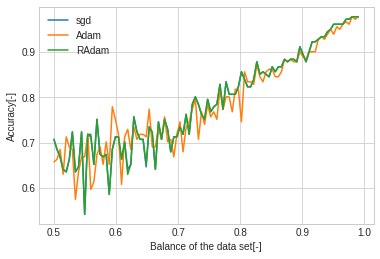

In [5]:
plt.style.use('seaborn-whitegrid')
plt.plot(spects, sgd_acc, label='sgd')
plt.plot(spects, adam_acc, label='Adam')
plt.plot(spects, radam_acc, label='RAdam')
plt.xlabel('Balance of the data set[-]')
plt.ylabel('Accuracy[-]')
plt.legend(loc='upper left')
plt.savefig('figures/accuracy-spect.png')

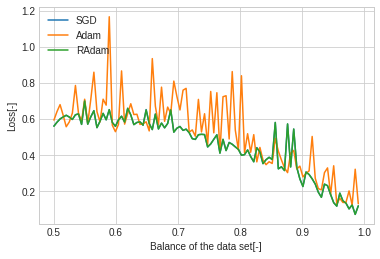

In [6]:
plt.style.use('seaborn-whitegrid')
plt.plot(spects, sgd_loss, label='SGD')
plt.plot(spects, adam_loss, label='Adam')
plt.plot(spects, radam_loss, label='RAdam')
plt.xlabel('Balance of the data set[-]')
plt.ylabel('Loss[-]')
plt.legend(loc='upper left')
plt.savefig('figures/loss-spect.png')

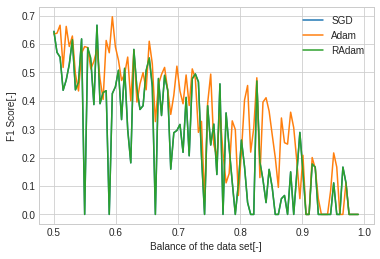

In [7]:
plt.style.use('seaborn-whitegrid')
plt.plot(spects, sgd_f1, label='SGD')
plt.plot(spects, adam_f1, label='Adam')
plt.plot(spects, radam_f1, label='RAdam')
plt.xlabel('Balance of the data set[-]')
plt.ylabel('F1 Score[-]')
plt.legend(loc='upper right')
plt.savefig('figures/f1-spect.png')

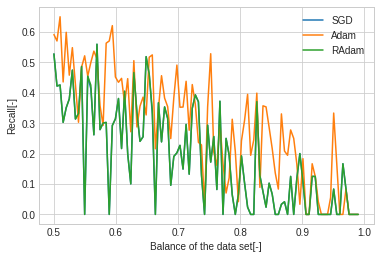

In [8]:
plt.style.use('seaborn-whitegrid')
plt.plot(spects, sgd_recall, label='SGD')
plt.plot(spects, adam_recall, label='Adam')
plt.plot(spects, radam_recall, label='RAdam')
plt.xlabel('Balance of the data set[-]')
plt.ylabel('Recall[-]')
plt.legend(loc='upper right')
plt.savefig('figures/recall-spect.png')

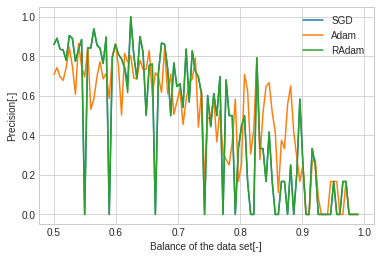

In [11]:
plt.style.use('seaborn-whitegrid')
plt.plot(spects, sgd_precision, label='SGD')
plt.plot(spects, adam_precision, label='Adam')
plt.plot(spects, radam_precision, label='RAdam')
plt.xlabel('Balance of the data set[-]')
plt.ylabel('Precision[-]')
plt.legend(loc='upper right')
plt.savefig('figures/precision-spect.png')

# Training and test effect

In [ ]:
def run_training_benchmarking(data, N_spec=3, epochs = 25):
    list_optimzers = ['adam', 'sgd', RAdam()]
    spects = np.linspace(0.5,0.99,N_spec)
    
    adam_train_acc = []
    adam_val_acc = []
    adam_train_loss = []
    adam_val_loss = []
    
    radam_train_acc = []
    radam_val_acc = []
    radam_train_loss = []
    radam_val_loss = []
    
    sgd_train_acc = []
    sgd_val_acc = []
    sgd_train_loss = []
    sgd_val_loss = []
    
    
    for spect in spects:
        one_hot_enc = build_spectrum (data,do_spectrum = True ,spect = spect)
        
        X = one_hot_enc.drop(columns=['y'])
        y = one_hot_enc['y']
        x_keras, y_keras = build_keras (X,y)
        
        model = build_model()
        for l in list_optimzers:
            model.compile(loss='binary_crossentropy', optimizer=l, metrics=['accuracy'])
            history = model.fit(np.array(x_keras), np.array(y_keras), 
                        epochs=epochs, batch_size=128,
                        validation_split=0.2, shuffle=True, verbose = 0)
            
            if l == 'adam':
                adam_train_acc.append(history.history['accuracy'])
                adam_val_acc.append(history.history['val_accuracy'])
                
                adam_train_loss.append(history.history['loss'])
                adam_val_loss.append(history.history['val_loss'])
                
                
            elif l == 'sgd':
                sgd_train_acc.append(history.history['accuracy'])
                sgd_val_acc.append(history.history['val_accuracy'])
                
                sgd_train_loss.append(history.history['loss'])
                sgd_val_loss.append(history.history['val_loss'])
            else:
                radam_train_acc.append(history.history['accuracy'])
                radam_val_acc.append(history.history['val_accuracy'])
                
                radam_train_loss.append(history.history['loss'])
                radam_val_loss.append(history.history['val_loss'])
    return sgd_train_acc, sgd_val_acc, sgd_train_loss, sgd_val_loss, radam_train_acc, radam_val_acc,radam_train_loss,radam_val_loss,adam_train_acc,adam_val_acc,adam_train_loss,adam_val_loss
                

In [ ]:
sgd_train_acc, sgd_val_acc, sgd_train_loss, sgd_val_loss, radam_train_acc, radam_val_acc,radam_train_loss,radam_val_loss,adam_train_acc,adam_val_acc,adam_train_loss,adam_val_loss = run_training_benchmarking(data)

# Results

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(adam_val_acc[0], label='Adam-test 50%')
plt.plot(adam_train_acc[0], label='Adam-train 50%')
plt.plot(adam_val_acc[1], label='Adam-test 75%')
plt.plot(adam_train_acc[1], label='Adam-train 75%')
plt.plot(adam_val_acc[2], label='Adam-test 99%')
plt.plot(adam_train_acc[2], label='Adam-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/accuracy-ADAM-epochs.png')

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(radam_val_acc[0], label='RAdam-test 50%')
plt.plot(radam_train_acc[0], label='RAdam-train 50%')
plt.plot(radam_val_acc[1], label='RAdam-test 75%')
plt.plot(radam_train_acc[1], label='RAdam-train 75%')
plt.plot(radam_val_acc[2], label='RAdam-test 99%')
plt.plot(radam_train_acc[2], label='RAdam-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/accuracy-RADAM-epochs.png')

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(sgd_val_acc[0], label='SGD-test 50%')
plt.plot(sgd_train_acc[0], label='SGD-train 50%')
plt.plot(sgd_val_acc[1], label='SGD-test 75%')
plt.plot(sgd_train_acc[1], label='SGD-train 75%')
plt.plot(sgd_val_acc[2], label='SGD-test 99%')
plt.plot(sgd_train_acc[2], label='SGD-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/accuracy-SGD-epochs.png')

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(adam_val_loss[0], label='Adam-test 50%')
plt.plot(adam_train_loss[0], label='Adam-train 50%')
plt.plot(adam_val_loss[1], label='Adam-test 75%')
plt.plot(adam_train_loss[1], label='Adam-train 75%')
plt.plot(adam_val_loss[2], label='Adam-test 99%')
plt.plot(adam_train_loss[2], label='Adam-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/loss-ADAM-epochs.png')

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(sgd_val_loss[0], label='SGD-test 50%')
plt.plot(sgd_train_loss[0], label='SGD-train 50%')
plt.plot(sgd_val_loss[1], label='SGD-test 75%')
plt.plot(sgd_train_loss[1], label='SGD-train 75%')
plt.plot(sgd_val_loss[2], label='SGD-test 99%')
plt.plot(sgd_train_loss[2], label='SGD-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/loss-SGD-epochs.png')

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(radam_val_loss[0], label='RAdam-test 50%')
plt.plot(radam_train_loss[0], label='RAdam-train 50%')
plt.plot(radam_val_loss[1], label='RAdam-test 75%')
plt.plot(radam_train_loss[1], label='RAdam-train 75%')
plt.plot(radam_val_loss[2], label='RAdam-test 99%')
plt.plot(radam_train_loss[2], label='RAdam-train 99%')
plt.xlabel('Epochs[-]')
plt.ylabel('Test Accuracy[-]')
plt.legend(loc='lower left', frameon = True)
plt.savefig('figures/loss-RADAM-epochs.png')